#**ML Home Loan** 

# Training Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the training dataset

In [3]:
df=pd.read_csv("/content/drive/MyDrive/MLProject/train_data.csv")

In [4]:
pd.set_option('display.max_columns',122)

In [5]:
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018634,-17210,-774,-5580.0,-755,NaN,1,1,1,1,0,0,Sales staff,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.264354,NaN,0.0124,NaN,0.9444,NaN,NaN,0.0000,0.0345,0.0417,NaN,NaN,NaN,0.0095,NaN,0.0000,0.0126,NaN,0.9444,NaN,NaN,0.0000,0.0345,0.0417,NaN,NaN,NaN,0.0099,NaN,0.000,0.0125,NaN,0.9444,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0074,Mixed,No,0.0,0.0,0.0,0.0,-150.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.018850,-18640,-96,-5711.0,-2175,25.0,1,1,0,1,0,1,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,1,1,Business Entity Type 3,0.581064,0.172251,0.686382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-444.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,"Spouse, partner",Working,Higher education,Married,House / apartment,0.022625,-14649,-6130,-1776.0,-4568,9.0,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 4,NaN,0.636218,0.540654,0.1979,0.1169,0.9841,0.7824,0.1119,0.1600,0.0690,0.4583,0.5000,0.1587,0.1614,0.1033,0.0,0.1880,0.2017,0.1213,0.9841,0.7909,0.1130,0.1611,0.0690,0.4583,0.5000,0.1623,0.1763,0.1076,0.0,0.199,0.1999,0.1169,0.9841,0.7853,0.1127,0.16,0.0690,0.4583,0.5000,0.1615,0.1642,0.1051,0.0,0.1919,reg oper account,block of flats,0.1789,Panel,No,1.0,0.0,1.0,0.0,0.

### Checking various parameters of all the Columns

In [6]:
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
count,184506.000000,184506.000000,1.845060e+05,1.845060e+05,184500.000000,1.843390e+05,184506.000000,184506.000000,184506.000000,184506.00000,184506.000000,62873.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184505.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,80432.000000,184093.000000,147850.000000,90931.000000,76531.000000,94606.000000,61749.000000,55535.000000,86186.000000,91699.000000,92780.000000,59262.000000,74963.000000,58294.000000,91972.000000,56360.000000,82718.000000,90931.000000,76531.000000,94606.000000,61749.000000,55535.000000,86186.000000,91699.000000,92780.000000,59262.000000,74963.000000,58294.000000,91972.00000,56360.000000,82718.000000,90931.000000,76531.000000,94606.000000,61749.000000,55535.000000,86186.000000,91699.000000,92780.000000,59262.000000,74963.000000,58294.000000,91972.000000,56360.000000,82718.000000,95558.000000,183867.000000,183867.000000,183867.000000,183867.000000,184505.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.0,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,159508.000000,159508.000000,159508.000000,159508.000000,159508.000000,159508.000000,184506.000000
mean,278031.658488,0.416463,1.689985e+05,5.992854e+05,27114.455805,5.386926e+05,0.020868,-16036.718307,63838.583271,-4984.89506,-2994.113948,12.049115,0.999995,0.819849,0.199115,0.998043,0.281611,0.056638,2.152706,2.051787,2.031332,12.062963,0.015176,0.051299,0.041175,0.078778,0.230323,0.179257,0.502568,0.514616,0.510894,0.117193,0.088303,0.977795,0.752196,0.044500,0.078558,0.149578,0.225968,0.231827,0.066468,0.100229,0.107146,0.008890,0.028265,0.113888,0.087360,0.977083,0.759342,0.042394,0.074057,0.144987,0.221899,0.227819,0.065124,0.104988,0.10566,0.008094,0.026867,0.117568,0.087798,0.977831,0.755489,0.044459,0.077690,0.149065,0.225543,0

#### Column no 42-86 are Normalised

### Checking for any Duplicated Rows in the Dataset

In [7]:
X = df.drop(['SK_ID_CURR'], axis=1)

In [8]:
df.shape

(184506, 122)

In [9]:
X.duplicated().sum()

0

In [10]:
df.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET'],
      dtype='object', length=122)

In [11]:
df.shape[1]

122

In [12]:
df.shape[0]

184506

### Analysing various Data types present in the Dataset

In [13]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
pd.set_option('display.max_rows',122)

### Checking for NULL Values in each Column

In [15]:
df.isnull().sum()

SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          6
AMT_GOODS_PRICE                    167
NAME_TYPE_SUITE                    770
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     121633
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [16]:
df = df.drop(['SK_ID_CURR'],axis=1)

## Dropping those columns which have more than 60 % NULL Values

In [17]:
df = df.drop(['YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_AVG',
             'YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MODE',
              'YEARS_BUILD_MEDI','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI',
              'FONDKAPREMONT_MODE','BASEMENTAREA_AVG','LANDAREA_AVG','BASEMENTAREA_MODE','LANDAREA_MODE','BASEMENTAREA_MEDI',
              'LANDAREA_MEDI'],axis=1)

In [18]:
df.shape

(184506, 99)

In [19]:
df.head

<bound method NDFrame.head of        NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           F            N               Y   
1              Cash loans           M            Y               Y   
2              Cash loans           M            Y               Y   
3              Cash loans           M            N               N   
4              Cash loans           F            N               Y   
...                   ...         ...          ...             ...   
184501         Cash loans           F            N               Y   
184502    Revolving loans           F            N               Y   
184503         Cash loans           F            N               N   
184504         Cash loans           F            N               Y   
184505         Cash loans           F            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  1           67500.0    227520.0      11065.

### Checking for Unique Values in Each Column

In [20]:
df.nunique(axis=0)

NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       14
AMT_INCOME_TOTAL                 1768
AMT_CREDIT                       4855
AMT_ANNUITY                     12412
AMT_GOODS_PRICE                   793
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17334
DAYS_EMPLOYED                   11404
DAYS_REGISTRATION               15002
DAYS_ID_PUBLISH                  6086
OWN_CAR_AGE                        60
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
OCCUPATION_T

### Value Counts of Values in Each Column

In [21]:
for column in df:
    print(df[column].value_counts())

Cash loans         167013
Revolving loans     17493
Name: NAME_CONTRACT_TYPE, dtype: int64
F      121357
M       63147
XNA         2
Name: CODE_GENDER, dtype: int64
N    121630
Y     62876
Name: FLAG_OWN_CAR, dtype: int64
Y    128059
N     56447
Name: FLAG_OWN_REALTY, dtype: int64
0     129082
1      36984
2      15938
3       2190
4        237
5         48
6         12
7          5
14         2
12         2
8          2
9          2
10         1
19         1
Name: CNT_CHILDREN, dtype: int64
135000.0     21456
112500.0     18455
157500.0     15988
180000.0     14874
90000.0      13404
             ...  
190611.0         1
110475.0         1
124006.5         1
69246.0          1
1147500.0        1
Name: AMT_INCOME_TOTAL, Length: 1768, dtype: int64
450000.0     5884
675000.0     5289
225000.0     4885
180000.0     4327
270000.0     4301
             ... 
172206.0        1
55692.0         1
1897155.0       1
1586281.5       1
744988.5        1
Name: AMT_CREDIT, Length: 4855, dtype: int64


#### Dropping columns as One Value is very dominant over other

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf761faac0>]],
      dtype=object)

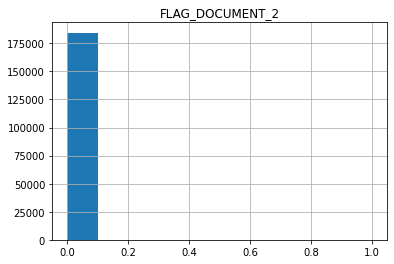

In [22]:
df.hist(column='FLAG_DOCUMENT_2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf760cdc40>]],
      dtype=object)

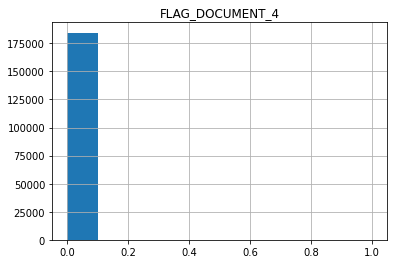

In [23]:
df.hist(column='FLAG_DOCUMENT_4')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf75c0a4c0>]],
      dtype=object)

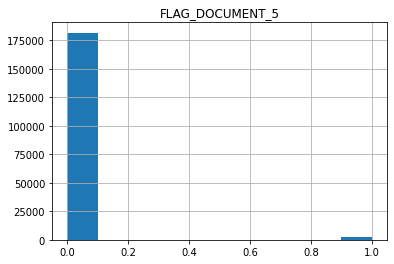

In [24]:
df.hist(column='FLAG_DOCUMENT_5')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf75b99f10>]],
      dtype=object)

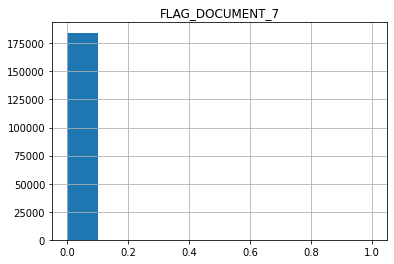

In [25]:
df.hist(column='FLAG_DOCUMENT_7')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf75bf2bb0>]],
      dtype=object)

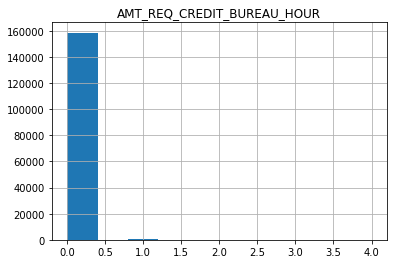

In [26]:
df.hist(column='AMT_REQ_CREDIT_BUREAU_HOUR')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf87dea1c0>]],
      dtype=object)

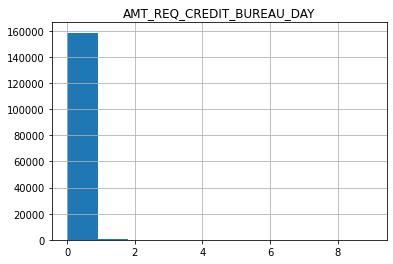

In [27]:
df.hist(column='AMT_REQ_CREDIT_BUREAU_DAY')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf75a2d370>]],
      dtype=object)

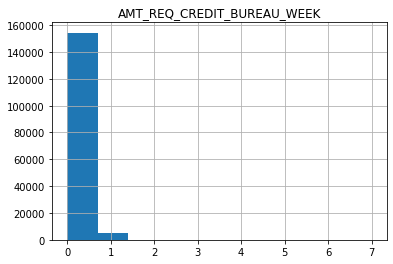

In [28]:
df.hist(column='AMT_REQ_CREDIT_BUREAU_WEEK')

In [29]:
df.shape

(184506, 99)

In [30]:
df = df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7',
             'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
             'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
              'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR',
             'AMT_REQ_CREDIT_BUREAU_DAY','HOUR_APPR_PROCESS_START'],axis=1)

In [31]:
df.shape

(184506, 79)

## Analysed the Correlation Matrix, But it did not helped in improving the Score

In [32]:
correlation_matrix = df.corr().abs()

In [33]:
correlation_matrix

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
CNT_CHILDREN,1.000000,0.012412,0.004094,0.025078,0.000308,0.023497,0.330827,0.240104,0.184052,0.027332,0.007761,0.001347,0.241009,0.055808,0.002328,0.032419,0.024306,0.878366,0.024697,0.023332,0.012389,0.008882,0.015546,0.022805,0.072071,0.069332,0.134094,0.015945,0.043161,0.011978,0.008402,0.004188,0.008107,0.005473,0.008169,0.002536,0.011423,0.007252,0.004155,0.006792,0.005839,0.007960,0.003042,0.011837,0.007893,0.004048,0.008229,0.005238,0.008256,0.003078,0.006734,0.014868,0.000762,0.014627,0.000949,0.007501,0.057111,0.156982,0.050263,0.001852,0.012725,0.006363,0.041662,0.020011
AMT_INCOME_TOTAL,0.012412,1.000000,0.126582,0.155473,0.128758,0.059513,0.023063,0.052235,0.022776,0.005600,0.109397,0.000340,0.052094,0.014818,0.006003,0.001323,0.030192,0.015476,0.069157,0.073818,0.024677,0.049894,0.046143,0.002701,0.004284,0.005638,0.021090,0.047310,0.025327,0.026778,0.004288,0.034020,0.004012,0.046880,0.030949,0.078061,0.023275,0.003894,0.030933,0.001467,0.045204,0.027208,0.065475,0.026148,0.004271,0.033312,0.003497,0.046530,0.030432,0.075071,0.032420,0.011337,0.010930,0.011248,0.010811,0.013108,0.013315,0.036892,0.057226,0.000112,0.019692,0.003585,0.008472,0.000685
AMT_CREDIT,0.004094,0.126582,1.000000,0.769866,0.986931,0.099582,0.055122,0.065930,0.009479,0.007774,0.092762,0.001856,0.064726,0.022730,0.024074,0.025456,0.016665,0.064609,0.101846,0.110978,0.023144,0.053862,0.054032,0.027053,0.018557,0.000629,0.168150,0.130589,0.043443,0.060988,0.007281,0.080384,0.013313,0.102915,0.070792,0.035690,0.052880,0.006468,0.074021,0.008067,0.100533,0.063193,0.030720,0.058865,0.006809,0.078825,0.011746,0.102567,0.069407,0.034539,0.072694,0.002826,0.021077,0.002624,0.023133,0.072670,0.094171,0.045598,0.084254,0.007187,0.053915,0.014628,0.049625,0.030653
AMT_ANNUITY,0.025078,0.155473,0.769866,1.000000,0.774882,0.117940,0.010214,0.103329,0.038171,0.010109,0.095833,0.000194,0.102608,0.026528,0.022591,0.009342,0.070636,0.079257,0.128911,0.141878,0.040232,0.081107,0.076526,0.005656,0.001955,0.011377,0.121374,0.125064,0.030344,0.077782,0.014884,0.101015,0.013629,0.129763,0.089884,0.052815,0.066795,0.014542,0.091698,0.005920,0.126162,0.079296,0.044610,0.075209,0.014646,0.099020,0.011857,0.128594,0.088114,0.051034,0.092010,0.012595,0.022754,0.012271,0.023499,0.062208,0.099567,0.071913,0.131851,0.008252,0.038314,0.010053,0.011656,0.011600
AMT_GOODS_PRICE,0.000308,0.128758,0.986931,0.774882,1.000000,0.103845,0.053011,0.063830,0.011557,0.010484,0.102678,0.001808,0.062593,0.000853,0.020955,0.041315,0.017237,0.062898,0.103905,0.112338,0.025368,0.055381,0.054589,0.027314,0.020100,0.000744,0.175549,0.138477,0.048162,0.065533,0.007769,0.083451,0.017393,0.108064,0.076281,0.039825,0.057401,0.006956,0.077252,0.012266,0.105584,0.068706,0.034906,0.063439,0.007422,0.081982,0.015902,0.107666,0.074891,0.038704,0.077

In [34]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

<ipython-input-34-7233d339ed0f>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [35]:
upper

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
CNT_CHILDREN,NaN,0.012412,0.004094,0.025078,0.000308,0.023497,0.330827,0.240104,0.184052,0.027332,0.007761,0.001347,0.241009,0.055808,0.002328,0.032419,0.024306,0.878366,0.024697,0.023332,0.012389,0.008882,0.015546,0.022805,0.072071,0.069332,0.134094,0.015945,0.043161,0.011978,0.008402,0.004188,0.008107,0.005473,0.008169,0.002536,0.011423,0.007252,0.004155,0.006792,0.005839,0.007960,0.003042,0.011837,0.007893,0.004048,0.008229,0.005238,0.008256,0.003078,0.006734,0.014868,0.000762,0.014627,0.000949,0.007501,0.057111,0.156982,0.050263,0.001852,0.012725,0.006363,0.041662,0.020011
AMT_INCOME_TOTAL,NaN,NaN,0.126582,0.155473,0.128758,0.059513,0.023063,0.052235,0.022776,0.005600,0.109397,0.000340,0.052094,0.014818,0.006003,0.001323,0.030192,0.015476,0.069157,0.073818,0.024677,0.049894,0.046143,0.002701,0.004284,0.005638,0.021090,0.047310,0.025327,0.026778,0.004288,0.034020,0.004012,0.046880,0.030949,0.078061,0.023275,0.003894,0.030933,0.001467,0.045204,0.027208,0.065475,0.026148,0.004271,0.033312,0.003497,0.046530,0.030432,0.075071,0.032420,0.011337,0.010930,0.011248,0.010811,0.013108,0.013315,0.036892,0.057226,0.000112,0.019692,0.003585,0.008472,0.000685
AMT_CREDIT,NaN,NaN,NaN,0.769866,0.986931,0.099582,0.055122,0.065930,0.009479,0.007774,0.092762,0.001856,0.064726,0.022730,0.024074,0.025456,0.016665,0.064609,0.101846,0.110978,0.023144,0.053862,0.054032,0.027053,0.018557,0.000629,0.168150,0.130589,0.043443,0.060988,0.007281,0.080384,0.013313,0.102915,0.070792,0.035690,0.052880,0.006468,0.074021,0.008067,0.100533,0.063193,0.030720,0.058865,0.006809,0.078825,0.011746,0.102567,0.069407,0.034539,0.072694,0.002826,0.021077,0.002624,0.023133,0.072670,0.094171,0.045598,0.084254,0.007187,0.053915,0.014628,0.049625,0.030653
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.774882,0.117940,0.010214,0.103329,0.038171,0.010109,0.095833,0.000194,0.102608,0.026528,0.022591,0.009342,0.070636,0.079257,0.128911,0.141878,0.040232,0.081107,0.076526,0.005656,0.001955,0.011377,0.121374,0.125064,0.030344,0.077782,0.014884,0.101015,0.013629,0.129763,0.089884,0.052815,0.066795,0.014542,0.091698,0.005920,0.126162,0.079296,0.044610,0.075209,0.014646,0.099020,0.011857,0.128594,0.088114,0.051034,0.092010,0.012595,0.022754,0.012271,0.023499,0.062208,0.099567,0.071913,0.131851,0.008252,0.038314,0.010053,0.011656,0.011600
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,0.103845,0.053011,0.063830,0.011557,0.010484,0.102678,0.001808,0.062593,0.000853,0.020955,0.041315,0.017237,0.062898,0.103905,0.112338,0.025368,0.055381,0.054589,0.027314,0.020100,0.000744,0.175549,0.138477,0.048162,0.065533,0.007769,0.083451,0.017393,0.108064,0.076281,0.039825,0.057401,0.006956,0.077252,0.012266,0.105584,0.068706,0.034906,0.063439,0.007422,0.081982,0.015902,0.107666,0.074891,0.038704,0.077386,0.003133,0.022169,0.002950,0.023874,0.075190,0.072420,0.048843,0.082229

In [36]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [37]:
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [38]:
df.corrwith(df["TARGET"])

CNT_CHILDREN                    0.020011
AMT_INCOME_TOTAL               -0.000685
AMT_CREDIT                     -0.030653
AMT_ANNUITY                    -0.011600
AMT_GOODS_PRICE                -0.040055
REGION_POPULATION_RELATIVE     -0.039028
DAYS_BIRTH                      0.080821
DAYS_EMPLOYED                  -0.046875
DAYS_REGISTRATION               0.043995
DAYS_ID_PUBLISH                 0.051051
OWN_CAR_AGE                     0.038363
FLAG_MOBIL                      0.000690
FLAG_EMP_PHONE                  0.047956
FLAG_WORK_PHONE                 0.029652
FLAG_CONT_MOBILE                0.000515
FLAG_PHONE                     -0.023338
FLAG_EMAIL                     -0.001689
CNT_FAM_MEMBERS                 0.009743
REGION_RATING_CLIENT            0.061597
REGION_RATING_CLIENT_W_CITY     0.063491
REG_REGION_NOT_LIVE_REGION      0.004225
REG_REGION_NOT_WORK_REGION      0.006214
LIVE_REGION_NOT_WORK_REGION     0.002573
REG_CITY_NOT_LIVE_CITY          0.042732
REG_CITY_NOT_WOR

Tried removing these columns but did not helped in improving Score

In [39]:
#df = df.drop(['AMT_GOODS_PRICE','FLAG_EMP_PHONE','REGION_RATING_CLIENT_W_CITY','APARTMENTS_MODE','BASEMENTAREA_MODE',
#              'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE',
#              'APARTMENTS_MEDI','BASEMENTAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','LANDAREA_MEDI',
#              'LIVINGAREA_MEDI','NONLIVINGAREA_MEDI','OBS_60_CNT_SOCIAL_CIRCLE'],axis=1)

### DAYS_EMPLOYED had 32,919 values with Value = 365243, which may be depicting NULL values as it is very large compared to others, so we replaces it with nan value.

In [40]:
df['DAYS_EMPLOYED'].replace(365243, np.nan,inplace=True)

In [41]:
df.columns[df.isin(['XNA']).any()]

Index(['CODE_GENDER', 'ORGANIZATION_TYPE'], dtype='object')

### ORGANIZATION_TYPE had 33236 values which are XNA which may be depicting Null values, so replaced it with nan value.

In [42]:
df['ORGANIZATION_TYPE'].replace('XNA', np.nan,inplace=True)

In [43]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    40943
Self-employed             22877
Other                      9961
Medicine                   6752
Business Entity Type 2     6332
Government                 6225
School                     5303
Trade: type 7              4692
Kindergarten               4150
Construction               4075
Business Entity Type 1     3529
Transport: type 4          3228
Trade: type 3              2093
Industry: type 3           2011
Security                   1993
Industry: type 9           1983
Housing                    1786
Industry: type 11          1613
Military                   1548
Bank                       1493
Agriculture                1439
Police                     1406
Transport: type 2          1347
Postal                     1311
Security Ministries        1205
Trade: type 2              1200
Restaurant                 1094
Services                    944
University                  793
Industry: type 7            777
Transport: type 3           722
Industry

### Gender Column also had 2 XNA Value, Dropping those 2 rows from Dataset

In [44]:
df['CODE_GENDER'].value_counts()

F      121357
M       63147
XNA         2
Name: CODE_GENDER, dtype: int64

In [45]:
index_gender = df[ (df['CODE_GENDER'] == 'XNA')].index
df.drop(index_gender , inplace=True)

In [46]:
df['CODE_GENDER'].value_counts()

F    121357
M     63147
Name: CODE_GENDER, dtype: int64

### Analysing Dataset Based on datatypes

In [47]:
float_data=list(df.select_dtypes(['float64']).columns)
float_data

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [48]:
int_data=list(df.select_dtypes(['int64']).columns)
int_data

['CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'TARGET']

In [49]:
for i in float_data:
    print(i)
    print(df[i].isnull().sum())

AMT_INCOME_TOTAL
0
AMT_CREDIT
0
AMT_ANNUITY
6
AMT_GOODS_PRICE
167
REGION_POPULATION_RELATIVE
0
DAYS_EMPLOYED
33236
DAYS_REGISTRATION
0
OWN_CAR_AGE
121632
CNT_FAM_MEMBERS
1
EXT_SOURCE_1
104074
EXT_SOURCE_2
413
EXT_SOURCE_3
36656
APARTMENTS_AVG
93575
YEARS_BEGINEXPLUATATION_AVG
89900
ELEVATORS_AVG
98320
ENTRANCES_AVG
92807
FLOORSMAX_AVG
91726
LIVINGAREA_AVG
92534
NONLIVINGAREA_AVG
101787
APARTMENTS_MODE
93575
YEARS_BEGINEXPLUATATION_MODE
89900
ELEVATORS_MODE
98320
ENTRANCES_MODE
92807
FLOORSMAX_MODE
91726
LIVINGAREA_MODE
92534
NONLIVINGAREA_MODE
101787
APARTMENTS_MEDI
93575
YEARS_BEGINEXPLUATATION_MEDI
89900
ELEVATORS_MEDI
98320
ENTRANCES_MEDI
92807
FLOORSMAX_MEDI
91726
LIVINGAREA_MEDI
92534
NONLIVINGAREA_MEDI
101787
TOTALAREA_MODE
88948
OBS_30_CNT_SOCIAL_CIRCLE
639
DEF_30_CNT_SOCIAL_CIRCLE
639
OBS_60_CNT_SOCIAL_CIRCLE
639
DEF_60_CNT_SOCIAL_CIRCLE
639
DAYS_LAST_PHONE_CHANGE
1
AMT_REQ_CREDIT_BUREAU_WEEK
24998
AMT_REQ_CREDIT_BUREAU_MON
24998
AMT_REQ_CREDIT_BUREAU_QRT
24998
AMT_REQ_CREDIT_B

In [50]:
for i in int_data:
    print(i)
    print(df[i].isnull().sum())

CNT_CHILDREN
0
DAYS_BIRTH
0
DAYS_ID_PUBLISH
0
FLAG_MOBIL
0
FLAG_EMP_PHONE
0
FLAG_WORK_PHONE
0
FLAG_CONT_MOBILE
0
FLAG_PHONE
0
FLAG_EMAIL
0
REGION_RATING_CLIENT
0
REGION_RATING_CLIENT_W_CITY
0
REG_REGION_NOT_LIVE_REGION
0
REG_REGION_NOT_WORK_REGION
0
LIVE_REGION_NOT_WORK_REGION
0
REG_CITY_NOT_LIVE_CITY
0
REG_CITY_NOT_WORK_CITY
0
LIVE_CITY_NOT_WORK_CITY
0
FLAG_DOCUMENT_3
0
FLAG_DOCUMENT_6
0
FLAG_DOCUMENT_8
0
TARGET
0


### We can see that Columns of Integer Datatype have no NULL Values

### Handling NULL Values



In [51]:
#list_median = []

#for i in float_data:
#    list_median.append(df[i].median())

#print(list_median)

In [52]:
#for col in range(len(float_data)):
 #   print(df[float_data[col]].isna().sum())
  #  df[float_data[col]].fillna(float(list_median[col]), inplace=True)
   # print(df[float_data[col]].isna().sum())

In [53]:
numeric = float_data + int_data

In [54]:
numeric

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 '

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

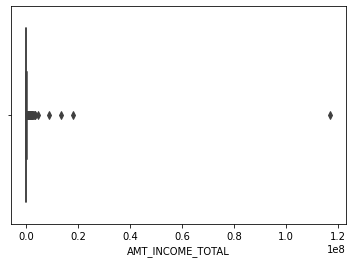

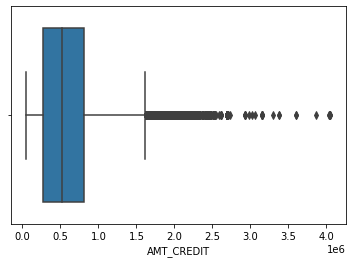

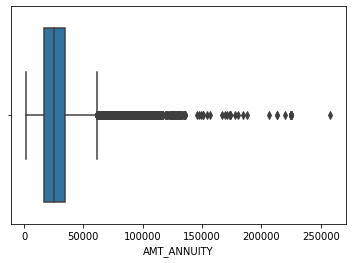

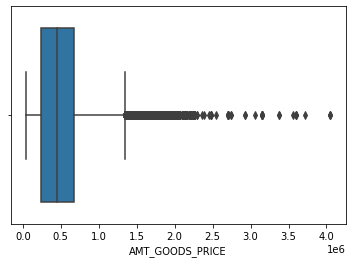

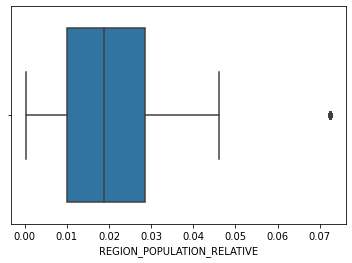

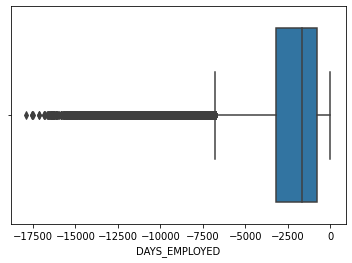

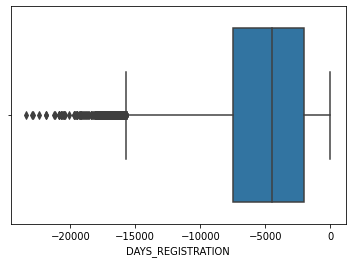

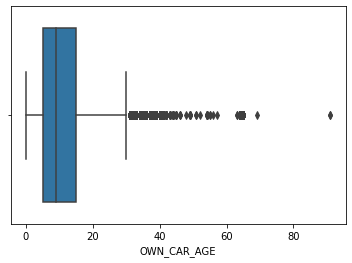

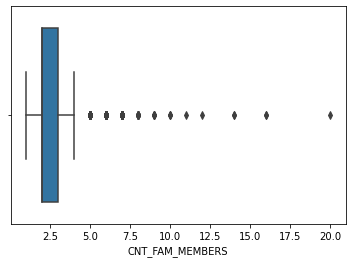

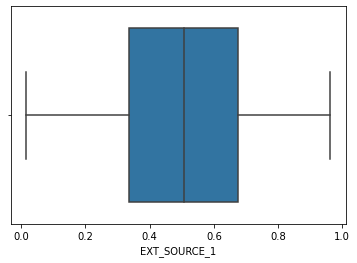

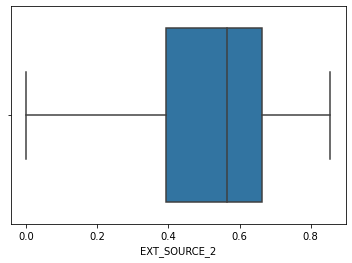

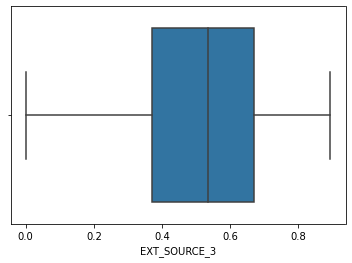

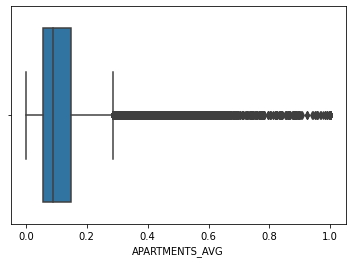

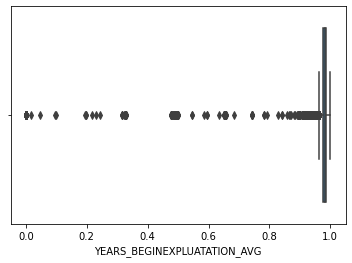

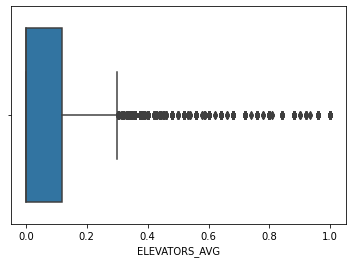

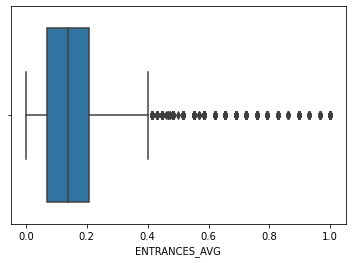

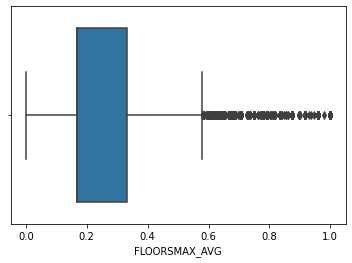

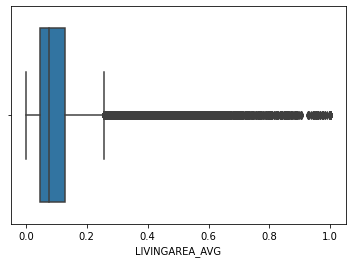

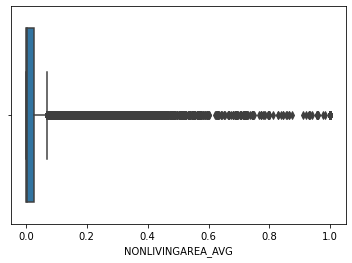

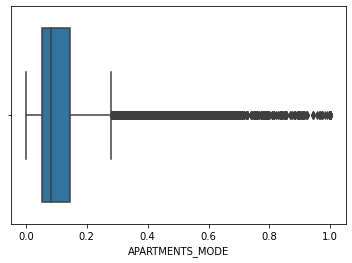

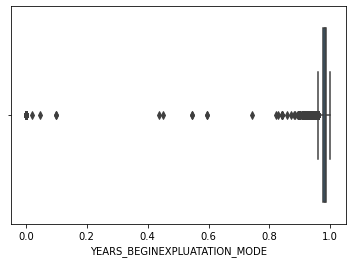

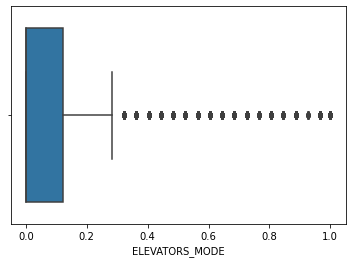

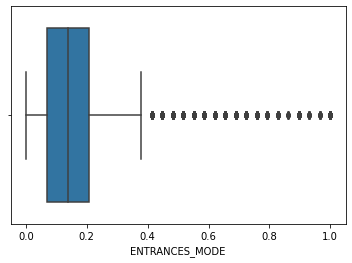

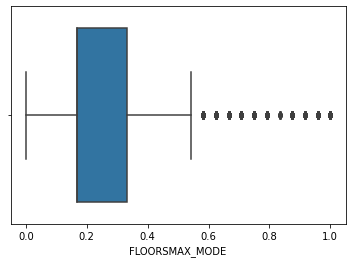

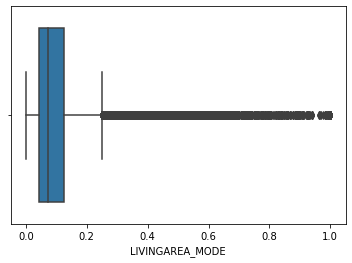

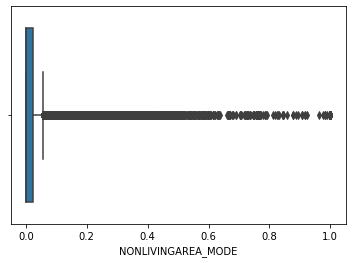

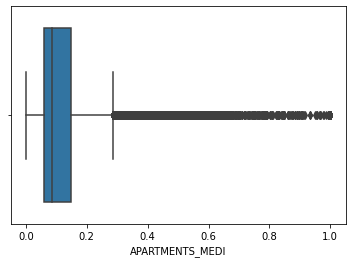

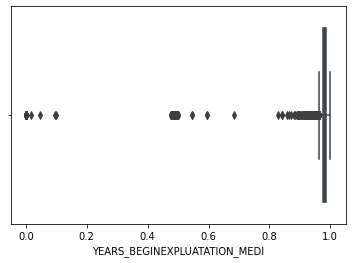

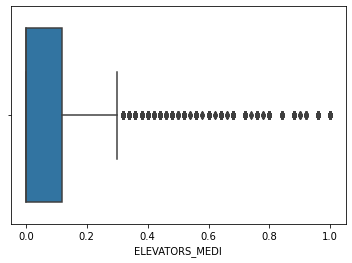

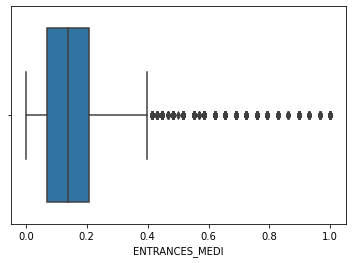

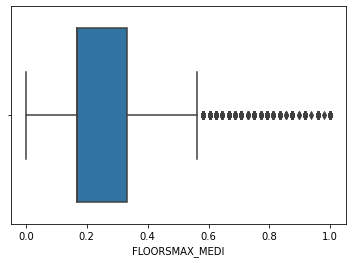

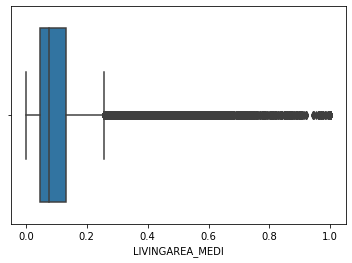

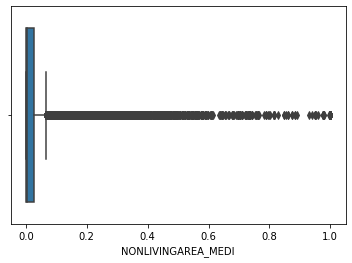

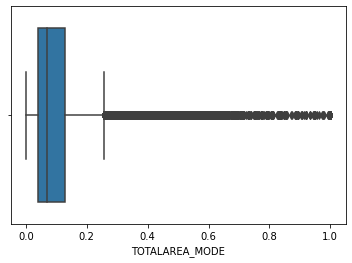

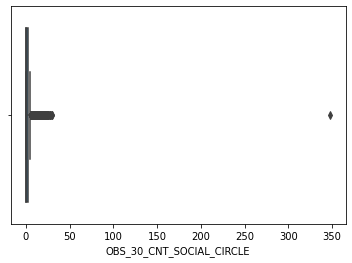

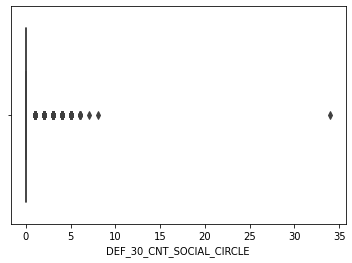

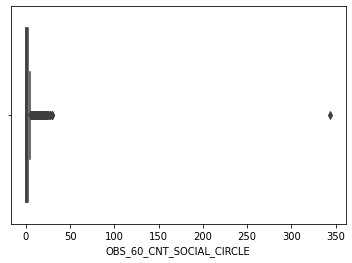

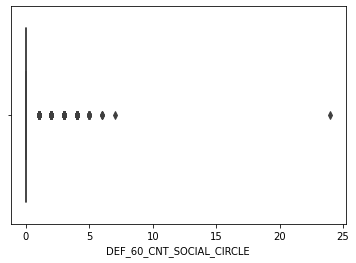

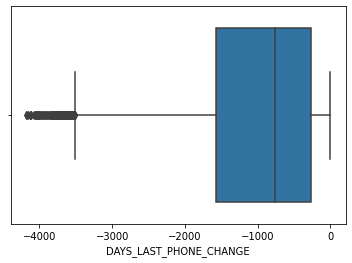

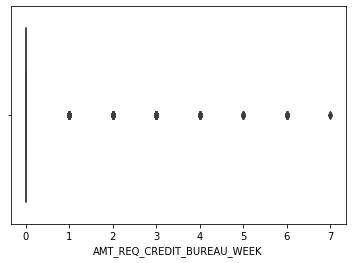

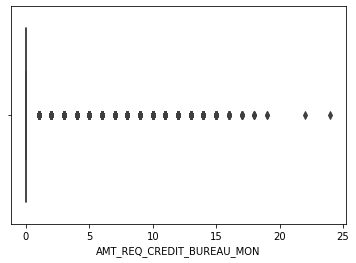

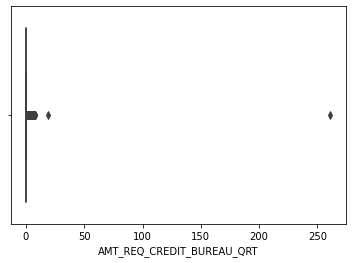

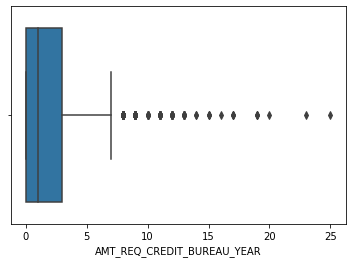

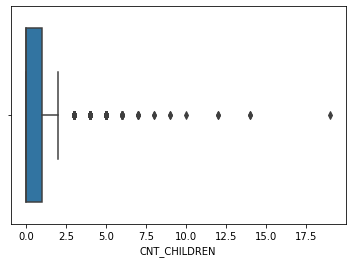

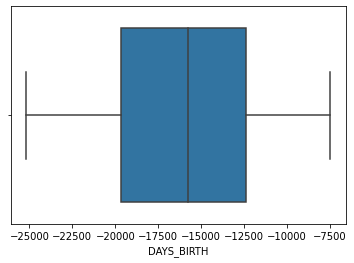

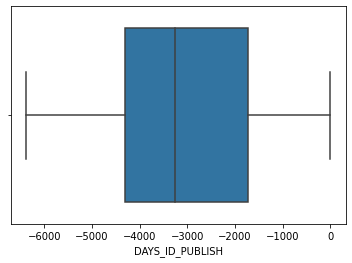

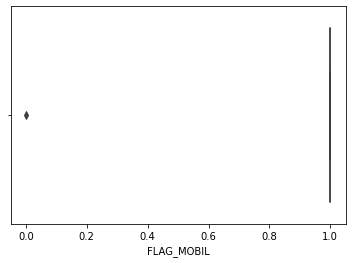

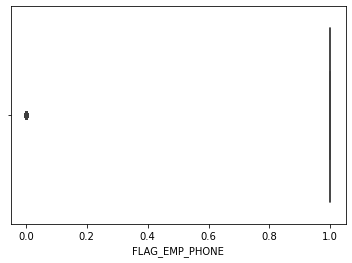

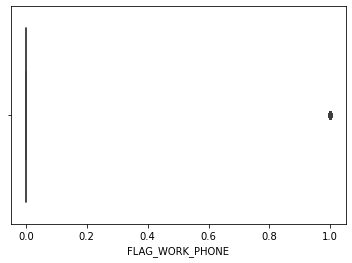

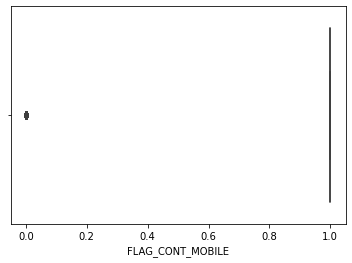

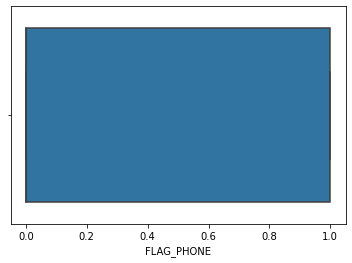

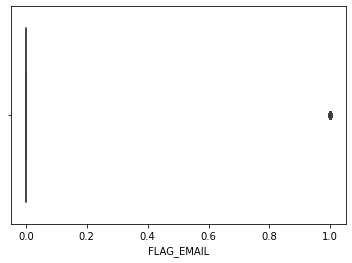

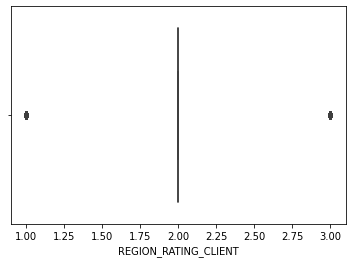

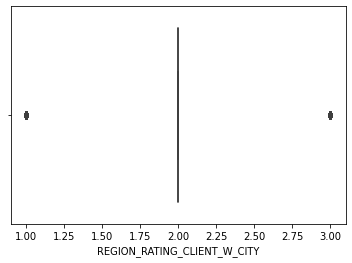

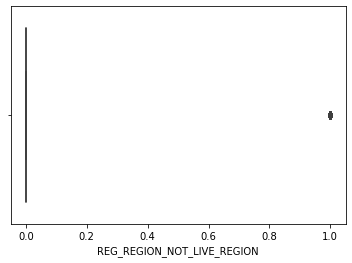

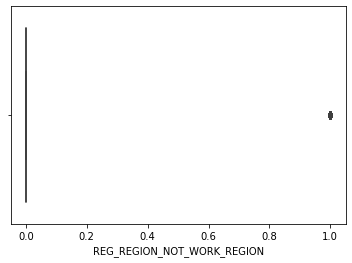

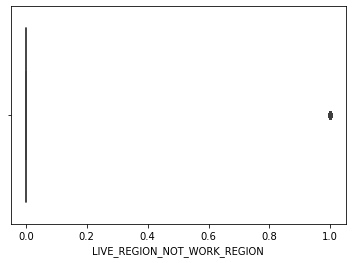

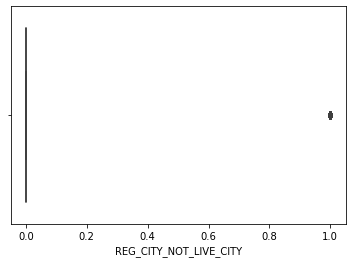

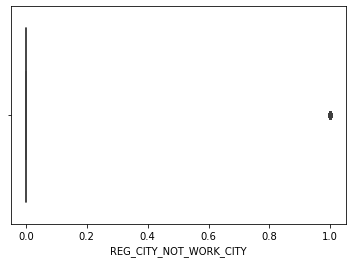

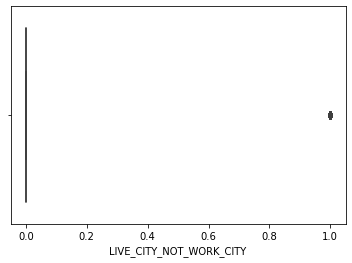

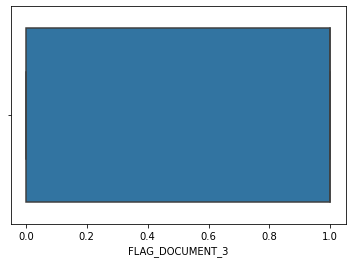

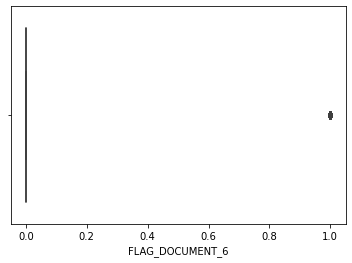

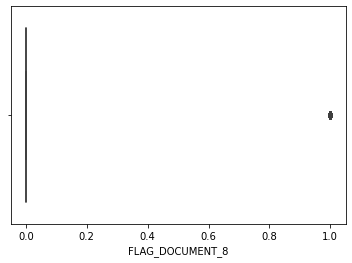

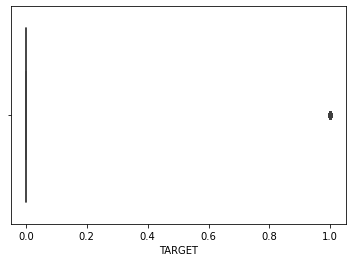

In [55]:
for i in numeric:
    plt.figure()
    sns.boxplot(df[i])

### For Outliers we Tried to remove it by IQR Capping, but then decided to remove only just very large values and left remaining as it is

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf74e98c40>]],
      dtype=object)

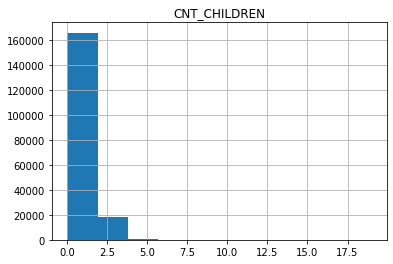

In [56]:
df.hist(column='CNT_CHILDREN')

In [57]:
df.shape

(184504, 79)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf74d15700>]],
      dtype=object)

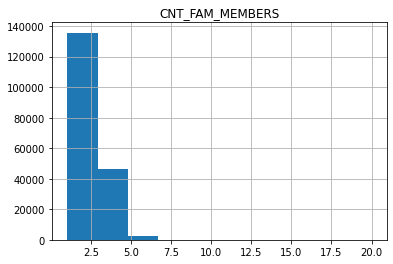

In [58]:
df.hist(column='CNT_FAM_MEMBERS')

In [59]:
df['AMT_INCOME_TOTAL'].skew()

341.29102150246376

In [60]:
df['AMT_INCOME_TOTAL'].max()

117000000.0

In [61]:
df.nlargest(10,'AMT_INCOME_TOTAL')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
113566,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922.0,-6762.0,-3643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,0.1031,0.9791,0.00,0.2069,0.1667,0.0615,NaN,0.1050,0.9791,0.0000,0.2069,0.1667,0.0641,NaN,0.1041,0.9791,0.00,0.2069,0.1667,0.0626,NaN,block of flats,0.0715,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,1,0,0,0.0,0.0,0.0,1.0,1
107258,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-15704,-4961.0,-3338.0,-4728,7.0,1,1,0,1,0,0,NaN,4.0,2,2,THURSDAY,0,0,0,0,0,0,Business Entity Type 3,0.543417,0.788606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1133.0,1,0,0,NaN,NaN,NaN,NaN,0
155730,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-13551,-280.0,-3953.0,-4972,10.0,1,1,1,1,0,0,NaN,2.0,2,2,SUNDAY,0,0,0,0,0,0,Business Entity Type 3,NaN,0.713507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-13.0,0,0,0,NaN,NaN,NaN,NaN,0
133395,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.010147,-16425,-8476.0,-7276.0,-1656,8.0,1,1,0,1,0,0,Managers,2.0,2,2,FRIDAY,0,0,0,0,0,0,Business Entity Type 1,0.652352,0.504086,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-3.0,0,0,1,0.0,0.0,0.0,0.0,0
177180,Revolving loans,M,Y,Y,0,4500000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.007330,-10778,-378.0,-4919.0,-3441,3.0,1,1,0,1,1,0,Managers,1.0,2,2,SATURDAY,0,1,1,0,0,0,Construction,0.226411,0.648046,0.619528,0.0670,0.9776,0.00,0.1379,0.1667,0.0606,0.0023,0.0630,0.9777,0.0000,0.1379,0.1667,0.0564,0.0024,0.0677,0.9776,0.00,0.1379,0.1667,0.0617,0.0023,block of flats,0.0426,"Stone, brick",No,1.0,0.0,1.0,0.0,-529.0,0,0,0,0.0,0.0,0.0,2.0,0
100603,Cash loans,M,Y,N,0,3600000.0,1113840.0,44302.5,900000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Municipal apartment,0.035792,-14897,-311.0,-4872.0,-2190,27.0,1,1,0,1,0,0,Core staff,1.0,2,2,FRIDAY,0,0,0,0,0,0,Self-employed,NaN,0.526475,0.746300

In [62]:
df.shape

(184504, 79)

In [63]:
df.shape

(184504, 79)

In [64]:
df['AMT_INCOME_TOTAL'].describe()

count    1.845040e+05
mean     1.689983e+05
std      2.942468e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
df['AMT_INCOME_TOTAL'] = np.where(df['AMT_INCOME_TOTAL'] > 220000.0, 148500.0, df['AMT_INCOME_TOTAL'])

In [66]:
df['AMT_CREDIT'].describe()

count    1.845040e+05
mean     5.992868e+05
std      4.022001e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.155290e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [67]:
df['AMT_CREDIT'] = np.where(df['AMT_CREDIT'] > 3000000.0, 515529.0, df['AMT_CREDIT'])

In [68]:
df.nlargest(20,'AMT_CREDIT')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
157607,Cash loans,F,N,N,0,192091.5,2980521.0,75474.0,2745000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,Rented apartment,0.008230,-8532,-394.0,-8532.0,-1223,NaN,1,1,1,1,0,0,Sales staff,1.0,2,2,MONDAY,1,1,0,1,1,0,Business Entity Type 3,NaN,0.381904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1.0,0,0,0,0.0,0.0,0.0,0.0,0
64451,Cash loans,F,N,N,0,190611.0,2931660.0,74110.5,2700000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,With parents,0.072508,-11765,-1233.0,-5332.0,-4124,NaN,1,1,1,1,0,0,Sales staff,2.0,1,1,THURSDAY,0,0,0,0,0,0,Trade: type 7,NaN,0.671956,NaN,0.0742,0.9762,0.0400,0.0345,0.3333,0.0488,0.0538,0.0756,0.9762,0.0403,0.0345,0.3333,0.0508,0.0570,0.0749,0.9762,0.04,0.0345,0.3333,0.0497,0.0549,block of flats,0.0501,Panel,No,0.0,0.0,0.0,0.0,-5.0,0,0,0,0.0,0.0,0.0,0.0,0
129461,Cash loans,M,Y,Y,2,148500.0,2931660.0,74241.0,2700000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-17531,-505.0,-2870.0,-721,6.0,1,1,1,1,1,0,Managers,4.0,1,1,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,NaN,0.635271,NaN,0.2753,0.9722,0.4000,0.3448,0.2917,0.3779,0.2266,0.2805,0.9722,0.4028,0.3448,0.2917,0.3937,0.2399,0.2779,0.9722,0.40,0.3448,0.2917,0.3847,0.2313,block of flats,0.3465,"Stone, brick",No,0.0,0.0,0.0,0.0,-4.0,0,0,0,0.0,1.0,0.0,0.0,0
167759,Cash loans,F,N,N,0,148500.0,2931660.0,74110.5,2700000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.032561,-19041,-10105.0,-1126.0,-2536,NaN,1,1,1,1,1,0,Managers,2.0,1,1,FRIDAY,0,0,0,0,0,0,Kindergarten,NaN,0.786459,0.852828,0.3165,0.9980,0.3000,0.1552,0.6875,0.3550,0.1984,0.2521,0.9970,0.2417,0.1034,0.3750,0.2801,0.0157,0.3196,0.9980,0.30,0.1552,0.6875,0.3614,0.2026,block of flats,0.2459,Monolithic,No,0.0,0.0,0.0,0.0,-3301.0,0,0,0,0.0,0.0,0.0,2.0,0
95252,Cash loans,M,Y,Y,0,148500.0,2925000.0,72495.0,2925000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006008,-9342,-1558.0,-4135.0,-1899,13.0,1,1,1,1,0,0,NaN,1.0,2,2,WEDNESDAY,1,1,0,1,1,0,Trade: type 3,NaN,0.432190,0.643026,0.1485,0.9881,0.1600,0.1379,0.3333,0.1546,0.0000,0.1513,0.9881,0.1611,0.1379,0.3333,0.1611,0.0000,0.1499,0.9881,0.16,0.1379,0.3333,0.1574,0.0000,block of flats,0.1544,Panel,No,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0
115462,Cash loans,M,Y,N,0,148500.0,2925000.0,72364.5,2925000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010

In [69]:
df['AMT_ANNUITY'].describe()

count    184498.000000
mean      27114.493631
std       14468.721666
min        1615.500000
25%       16555.500000
50%       24939.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [70]:
df['AMT_ANNUITY'] = np.where(df['AMT_ANNUITY'] > 200000.0, 24939.0, df['AMT_ANNUITY'])

In [71]:
df.nlargest(20,'AMT_ANNUITY')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
44918,Cash loans,M,Y,Y,0,148500.0,2031651.0,188136.0,1984500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018634,-10959,-1081.0,-1023.0,-3608,1.0,1,1,0,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,0,0,0,0,0,0,Transport: type 4,NaN,0.379368,0.297087,0.1485,0.9985,0.16,0.1379,0.3750,0.1436,0.0585,0.1513,0.9985,0.1611,0.1379,0.3750,0.1496,0.0620,0.1499,0.9985,0.16,0.1379,0.3750,0.1462,0.0598,block of flats,0.1665,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0.0,0.0,0
100928,Cash loans,M,N,N,2,148500.0,1993500.0,184477.5,1993500.0,Family,State servant,Higher education,Married,House / apartment,0.003069,-14558,-6257.0,-2676.0,-4966,NaN,1,1,0,1,0,0,Core staff,4.0,3,3,THURSDAY,0,0,0,0,0,0,Medicine,NaN,0.764874,0.448962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1685.0,1,0,0,0.0,1.0,0.0,2.0,0
95588,Revolving loans,M,Y,Y,2,148500.0,1800000.0,180000.0,1800000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-16237,-1700.0,-6223.0,-4508,3.0,1,1,0,1,0,0,Security staff,4.0,2,2,TUESDAY,0,0,0,0,0,0,Security,NaN,0.587979,0.718033,0.0974,0.9781,0.00,0.2069,0.1667,0.0507,0.0000,0.0735,0.9782,0.0000,0.1379,0.1667,0.0529,0.0000,0.0984,0.9781,0.00,0.2069,0.1667,0.0516,0.0000,block of flats,0.0399,Panel,No,0.0,0.0,0.0,0.0,-381.0,0,0,0,0.0,0.0,0.0,0.0,0
167401,Cash loans,F,N,Y,0,148500.0,1842768.0,177696.0,1800000.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.008230,-21020,NaN,-714.0,-4229,NaN,1,0,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,0,0,0,0,0,0,NaN,NaN,0.581347,0.686382,0.0639,0.9965,0.08,0.0690,0.3750,0.0852,0.0344,0.0641,0.9960,0.0806,0.0690,0.3750,0.0847,0.0348,0.0645,0.9965,0.08,0.0690,0.3750,0.0867,0.0351,block of flats,0.0717,"Stone, brick",No,3.0,0.0,3.0,0.0,-1295.0,1,0,0,0.0,1.0,0.0,1.0,0
36960,Cash loans,F,Y,Y,0,148500.0,1800000.0,173704.5,1800000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13343,-3039.0,-7360.0,-3512,4.0,1,1,0,1,0,0,Laborers,2.0,2,2,SATURDAY,0,0,0,0,0,0,Industry: type 3,NaN,0.609333,0.713631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,4.0,0.0,-1696.0,1,0,0,0.0,1.0,0.0,3.0,0
116238,Cash loans,F,N,N,2,148500.0,1800000.0,173704.5,1800000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-12177,-3508.0,-5208.0,-4330,NaN,1,1,0,1,0,0,Laborers,4.0,2,2,TUESDAY,0,0,0,0,0,0,Self-employed,0.363834,0.405872,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [72]:
df['AMT_GOODS_PRICE'].describe()

count    1.843370e+05
mean     5.386923e+05
std      3.692266e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [73]:
df['AMT_GOODS_PRICE'] = np.where(df['AMT_GOODS_PRICE'] > 3000000.0, 450000.0, df['AMT_GOODS_PRICE'])

In [74]:
df['OWN_CAR_AGE'].describe()

count    62872.000000
mean        12.049179
std         11.930665
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64

In [75]:
df['OWN_CAR_AGE'] = np.where(df['OWN_CAR_AGE'] > 80.0, 9.0, df['OWN_CAR_AGE'])

In [76]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].max()

348.0

In [77]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    183865.000000
mean          1.426025
std           2.456326
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [78]:
df.nlargest(5,'OBS_30_CNT_SOCIAL_CIRCLE')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
97439,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,0.020246,-10111,-1917.0,-2306.0,-2306,NaN,1,1,0,1,0,0,Core staff,1.0,3,3,THURSDAY,0,0,0,0,1,1,Police,0.360649,0.304506,0.357293,NaN,0.9866,0.12,0.0345,0.3333,0.0235,NaN,NaN,0.9866,0.1208,0.0345,0.3333,0.0245,NaN,NaN,0.9866,0.12,0.0345,0.3333,0.0239,NaN,block of flats,0.0299,Panel,No,348.0,34.0,344.0,24.0,-667.0,0,0,0,1.0,1.0,0.0,3.0,0
136561,Cash loans,F,N,N,0,99000.0,888840.0,29506.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-14862,-2859.0,-6336.0,-4587,NaN,1,1,0,1,0,0,Accountants,2.0,2,2,MONDAY,0,0,0,0,1,1,Bank,0.444227,0.545004,0.766234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.0,30.0,0.0,0.0,1,0,0,0.0,0.0,0.0,2.0,0
172660,Cash loans,M,Y,Y,0,99000.0,233208.0,18553.5,184500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.003813,-18088,-466.0,-8230.0,-1491,17.0,1,1,0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,0,0,0,0,0,0,Other,NaN,0.018246,0.215182,0.0804,0.9886,0.00,0.2069,0.1667,0.0730,0.0,0.0819,0.9886,0.0000,0.2069,0.1667,0.0760,0.0,0.0812,0.9886,0.00,0.2069,0.1667,0.0743,0.0,block of flats,0.0574,"Stone, brick",No,30.0,0.0,29.0,0.0,-167.0,0,0,1,0.0,0.0,0.0,7.0,1
50137,Cash loans,F,Y,Y,2,112500.0,1113840.0,57001.5,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.031329,-12050,-139.0,-3576.0,-2338,15.0,1,1,0,1,0,0,Laborers,4.0,2,2,TUESDAY,0,0,0,0,1,1,Business Entity Type 3,0.413606,0.515730,0.605836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,0.0,29.0,0.0,-413.0,1,0,0,0.0,0.0,0.0,3.0,0
149781,Cash loans,F,N,N,0,148500.0,339948.0,35824.5,315000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-14248,-2065.0,-7671.0,-4416,NaN,1,1,0,1,0,0,NaN,2.0,1,1,MONDAY,0,0,0,0,0,0,School,0.554063,0.745898,0.768808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,0.0,27.0,0.0,-1313.0,1,0,0,0.0,0.0,1.0,1.0,0


In [79]:
df['OBS_30_CNT_SOCIAL_CIRCLE'] = np.where(df['OBS_30_CNT_SOCIAL_CIRCLE'] > 347.0, 2.0, df['OBS_30_CNT_SOCIAL_CIRCLE'])

In [80]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    183865.000000
mean          0.144285
std           0.452175
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [81]:
df['DEF_30_CNT_SOCIAL_CIRCLE'] = np.where(df['DEF_30_CNT_SOCIAL_CIRCLE'] > 33.0, 0.0, df['DEF_30_CNT_SOCIAL_CIRCLE'])

In [82]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    183865.000000
mean          1.409170
std           2.434788
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [83]:
df['OBS_60_CNT_SOCIAL_CIRCLE'] = np.where(df['OBS_60_CNT_SOCIAL_CIRCLE'] > 343.0, 2.0, df['OBS_60_CNT_SOCIAL_CIRCLE'])

In [84]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    183865.000000
mean          0.100579
std           0.365802
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [85]:
df['DEF_60_CNT_SOCIAL_CIRCLE'] = np.where(df['DEF_60_CNT_SOCIAL_CIRCLE'] > 23.0, 0.0, df['DEF_60_CNT_SOCIAL_CIRCLE'])

In [86]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    159506.000000
mean          0.266767
std           0.894567
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [87]:
df['AMT_REQ_CREDIT_BUREAU_QRT'] = np.where(df['AMT_REQ_CREDIT_BUREAU_QRT'] > 260.0, 0.0, df['AMT_REQ_CREDIT_BUREAU_QRT'])

In [88]:
df['AMT_INCOME_TOTAL'].skew()

-0.26097807236993353

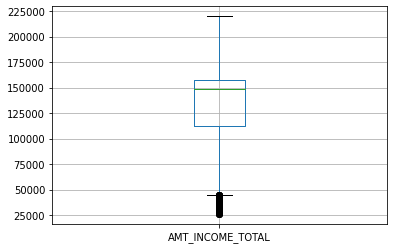

In [89]:
df.boxplot(['AMT_INCOME_TOTAL'])

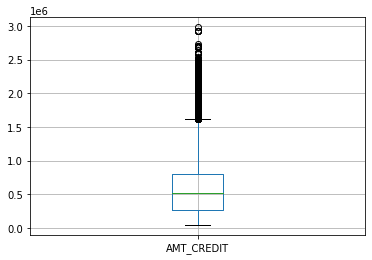

In [90]:
df.boxplot(['AMT_CREDIT'])

In [91]:
df.shape
median = df[i].median()

In [92]:
numeric_mod = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION',
               'OWN_CAR_AGE','CNT_FAM_MEMBERS','APARTMENTS_AVG','YEARS_BEGINEXPLUATATION_AVG',
              'ELEVATORS_AVG', 'ENTRANCES_AVG','FLOORSMAX_AVG','LIVINGAREA_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','YEARS_BEGINEXPLUATATION_MODE',
              'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','YEARS_BEGINEXPLUATATION_MEDI',
              'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','LIVINGAREA_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE',
               'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_WEEK',
                'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_CHILDREN','DAYS_BIRTH','DAYS_ID_PUBLISH']

In [93]:
#numeric_plot = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION',
#                'OWN_CAR_AGE','CNT_FAM_MEMBERS','CNT_CHILDREN','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','APARTMENTS_AVG',
#                'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LIVINGAREA_AVG','OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT',
#                'NONLIVINGAREA_AVG','TOTALAREA_MODE','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','YEARS_BEGINEXPLUATATION_AVG']

In [94]:
#for i in numeric_plot:    
#    q1,q3 = np.percentile(df[i],[25,75])
#    iqr = q3 - q1
#    lb = q1 - 1.5*iqr
#    up = q3 + 1.5*iqr
#    df[i] = np.where(df[i] > up, up, df[i])
#    df[i] = np.where(df[i] < lb, lb, df[i])

In [95]:
#for i in numeric:
#    plt.figure()
#    sns.boxplot(df[i])

In [96]:
list_median = []

for i in float_data:
    list_median.append(df[i].median())

print(list_median)

[148500.0, 515529.0, 24939.0, 450000.0, 0.01885, -1646.0, -4506.0, 9.0, 2.0, 0.506691720318096, 0.5659990279431356, 0.5352762504724826, 0.0876, 0.9816, 0.0, 0.1379, 0.1667, 0.0742, 0.0035, 0.084, 0.9816, 0.0, 0.1379, 0.1667, 0.073, 0.001, 0.0869, 0.9816, 0.0, 0.1379, 0.1667, 0.0746, 0.003, 0.0687, 0.0, 0.0, 0.0, 0.0, -756.0, 0.0, 0.0, 0.0, 1.0]


In [97]:
for col in range(len(float_data)):
    print(df[float_data[col]].isna().sum())
    df[float_data[col]].fillna(float(list_median[col]), inplace=True)
    print(df[float_data[col]].isna().sum())

0
0
0
0
6
0
167
0
0
0
33236
0
0
0
121632
0
1
0
104074
0
413
0
36656
0
93575
0
89900
0
98320
0
92807
0
91726
0
92534
0
101787
0
93575
0
89900
0
98320
0
92807
0
91726
0
92534
0
101787
0
93575
0
89900
0
98320
0
92807
0
91726
0
92534
0
101787
0
88948
0
639
0
639
0
639
0
639
0
1
0
24998
0
24998
0
24998
0
24998
0


In [98]:
x1=list(df.select_dtypes(['object']).columns)
x1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [99]:
for i in x1:
    print(i)
    print(df[i].isnull().sum())

NAME_CONTRACT_TYPE
0
CODE_GENDER
0
FLAG_OWN_CAR
0
FLAG_OWN_REALTY
0
NAME_TYPE_SUITE
770
NAME_INCOME_TYPE
0
NAME_EDUCATION_TYPE
0
NAME_FAMILY_STATUS
0
NAME_HOUSING_TYPE
0
OCCUPATION_TYPE
57866
WEEKDAY_APPR_PROCESS_START
0
ORGANIZATION_TYPE
33236
HOUSETYPE_MODE
92482
WALLSMATERIAL_MODE
93721
EMERGENCYSTATE_MODE
87336


### For Categorical Data removed the NULL Values with the Mode value, we also tried other techniques such as replacing it with Random Value of the same Column and also tried by replacing NULL Values in the proportion in which the existing values were present.

In [100]:
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0])

In [101]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      149827
Family              24044
Spouse, partner      6869
Children             1982
Other_B              1081
Other_A               528
Group of people       173
Name: NAME_TYPE_SUITE, dtype: int64

In [102]:
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])

In [103]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 90834
Sales staff              19351
Core staff               16491
Managers                 12780
Drivers                  11238
High skill tech staff     6859
Accountants               5897
Medicine staff            5130
Security staff            4074
Cooking staff             3621
Cleaning staff            2766
Private service staff     1565
Low-skill Laborers        1223
Waiters/barmen staff       819
Secretaries                787
Realty agents              434
HR staff                   321
IT staff                   314
Name: OCCUPATION_TYPE, dtype: int64

In [104]:
df['OCCUPATION_TYPE'].isnull().sum()

0

In [105]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].fillna(df['ORGANIZATION_TYPE'].mode()[0])

In [106]:
df['ORGANIZATION_TYPE'].isnull().sum()

0

In [107]:
df['HOUSETYPE_MODE'] = df['HOUSETYPE_MODE'].fillna(df['HOUSETYPE_MODE'].mode()[0])

In [108]:
df['HOUSETYPE_MODE'].isnull().sum()

0

In [109]:
df['WALLSMATERIAL_MODE'] = df['WALLSMATERIAL_MODE'].fillna(df['WALLSMATERIAL_MODE'].mode()[0])

In [110]:
df['WALLSMATERIAL_MODE'].isnull().sum()

0

In [111]:
df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].fillna(df['EMERGENCYSTATE_MODE'].mode()[0])

In [112]:
df['EMERGENCYSTATE_MODE'].isnull().sum()

0

In [113]:
print(df['EMERGENCYSTATE_MODE'].value_counts())

No     183061
Yes      1443
Name: EMERGENCYSTATE_MODE, dtype: int64


In [114]:
for i in x1:
    print(i)
    print(df[i].isnull().sum())
 

NAME_CONTRACT_TYPE
0
CODE_GENDER
0
FLAG_OWN_CAR
0
FLAG_OWN_REALTY
0
NAME_TYPE_SUITE
0
NAME_INCOME_TYPE
0
NAME_EDUCATION_TYPE
0
NAME_FAMILY_STATUS
0
NAME_HOUSING_TYPE
0
OCCUPATION_TYPE
0
WEEKDAY_APPR_PROCESS_START
0
ORGANIZATION_TYPE
0
HOUSETYPE_MODE
0
WALLSMATERIAL_MODE
0
EMERGENCYSTATE_MODE
0


In [115]:
for i in x1:
    print(i)
    print(df[i].value_counts())

NAME_CONTRACT_TYPE
Cash loans         167013
Revolving loans     17491
Name: NAME_CONTRACT_TYPE, dtype: int64
CODE_GENDER
F    121357
M     63147
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR
N    121629
Y     62875
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY
Y    128057
N     56447
Name: FLAG_OWN_REALTY, dtype: int64
NAME_TYPE_SUITE
Unaccompanied      149827
Family              24044
Spouse, partner      6869
Children             1982
Other_B              1081
Other_A               528
Group of people       173
Name: NAME_TYPE_SUITE, dtype: int64
NAME_INCOME_TYPE
Working                 95301
Commercial associate    42966
Pensioner               33227
State servant           12981
Unemployed                 15
Student                     6
Businessman                 6
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    131092
Higher education                  44809
Incomplete higher                  6178
Lower se

In [116]:
df.isnull().sum()

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

In [117]:
df.shape

(184504, 79)

In [118]:
print(df['TARGET'].value_counts())

0    169609
1     14895
Name: TARGET, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf757342e0>]],
      dtype=object)

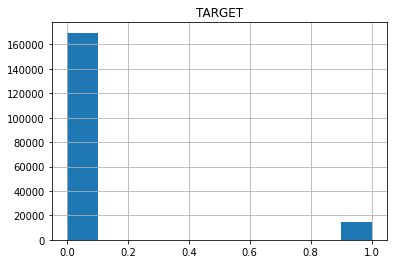

In [119]:
df.hist(column='TARGET')

### Using Label Encoding for Categorical Data

In [120]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
for i in x1:
    df[i]= label_encoder.fit_transform(df[i])

In [121]:
#df.to_csv("preprocessed.csv",index = False)

In [122]:
df = df.sample(frac = 1)

In [123]:
for i in x1:
    print(df[i].dtypes)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


In [124]:
y=df['TARGET']

In [125]:
df=df.drop(['TARGET'],axis=1)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20, random_state = 42)
#X_train = df
#y_train = y

In [127]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(learning_rate= 0.25, n_estimators= 700,max_bin=340,num_leaves= 240,max_depth=9,reg_alpha= 0.895,reg_lambda= 1.610,
                       subsample= 0.580,min_child_samples= 600,objective= 'binary',n_jobs= -1,is_unbalance = True, random_state=42)

model.fit(X_train, y_train)

LGBMClassifier(is_unbalance=True, learning_rate=0.25, max_bin=340, max_depth=9,
               min_child_samples=600, n_estimators=700, num_leaves=240,
               objective='binary', random_state=42, reg_alpha=0.895,
               reg_lambda=1.61, subsample=0.58)

In [128]:
ypred_lgb = model.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ypred_lgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.37%


In [130]:
from sklearn.metrics import roc_auc_score
 
auc = np.round(roc_auc_score(y_test, ypred_lgb), 3)

print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.631


In [131]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, ypred_lgb, average='macro')

print(f1)

0.5960006269222716


In [132]:
df.shape

(184504, 78)

## Using the Preprocessed Test Data to get the result

In [133]:
df1=pd.read_csv("/content/drive/MyDrive/MLProject/testlgbmpreproc.csv")

In [134]:
df1

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,367294,0,0,0,1,0,180000.0,265306.5,25317.0,252000.0,6,1,4,1,1,0.032561,-21413,-5323.0,-3666.0,-4551,9.0,1,1,0,1,1,0,8,2.0,1,1,5,0,0,0,0,0,0,5,0.505242,0.708546,0.535276,0.2397,0.9901,0.28,0.1293,0.5208,0.1783,0.0072,0.0504,0.9831,0.0806,0.0345,0.3333,0.0280,0.0015,0.2056,0.9901,0.28,0.1207,0.5417,0.1299,0.0047,0,0.2362,4,0,1.0,0.0,1.0,0.0,-1547.0,1,0,0,0.0,1.0,2.0,5.0
1,439847,0,0,0,1,0,202500.0,346500.0,21069.0,346500.0,6,7,4,2,1,0.026392,-20087,-1406.0,-7258.0,-3639,9.0,1,1,0,1,0,0,14,1.0,2,2,4,0,0,0,0,0,0,51,0.505242,0.649626,0.513694,0.1959,0.9871,0.00,0.4483,0.1667,0.1748,0.0010,0.1996,0.9871,0.0000,0.4483,0.1667,0.1821,0.0010,0.1978,0.9871,0.00,0.4483,0.1667,0.1779,0.0010,0,0.1375,4,0,0.0,0.0,0.0,0.0,-415.0,1,0,0,0.0,0.0,0.0,5.0
2,380562,0,1,1,0,0,148500.0,545040.0,36553.5,450000.0,6,7,4,1,1,0.010032,-13008,-1874.0,-4975.0,-5324,18.0,1,1,0,1,0,0,10,2.0,2,2,5,0,0,0,0,0,0,5,0.266554,0.645383,0.740799,0.0825,0.9757,0.00,0.1379,0.1667,0.0704,0.0000,0.0840,0.9757,0.0000,0.1379,0.1667,0.0733,0.0000,0.0833,0.9757,0.00,0.1379,0.1667,0.0717,0.0000,0,0.0712,4,0,0.0,0.0,0.0,0.0,-2459.0,1,0,0,0.0,0.0,1.0,5.0
3,407238,0,0,0,1,0,135000.0,307557.0,20682.0,265500.0,6,7,1,1,1,0.008625,-10699,-1454.0,-1020.0,-2220,9.0,1,1,0,1,0,0,14,2.0,2,2,6,0,0,0,0,1,1,42,0.358875,0.409479,0.456110,0.0876,0.9821,0.00,0.1379,0.1667,0.0748,0.0037,0.0840,0.9816,0.0000,0.1379,0.1667,0.0733,0.0012,0.0864,0.9816,0.00,0.1379,0.1667,0.0753,0.0032,0,0.0689,4,0,3.0,0.0,3.0,0.0,-564.0,1,0,0,1.0,0.0,1.0,2.0
4,239910,0,0,0,1,0,157500.0,1056447.0,31018.5,922500.0,1,3,4,1,1,0.010643,-18283,-1650.0,-10425.0,-1829,9.0,1,0,0,1,1,0,8,2.0,2,2,6,0,0,0,0,0,0,5,0.505242,0.265227,0.535276,0.0876,0.9821,0.00,0.1379,0.1667,0.0748,0.0037,0.0840,0.9816,0.0000,0.1379,0.1667,0.0733,0.0012,0.0864,0.9816,0.00,0.1379,0.1667,0.0753,0.0032,0,0.0689,4,0,3.0,0.0,3.0,0.0,-657.0,1,0,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,128638,0,0,1,1,1,117000.0,675000.0,32602.5,675000.0,6,7,4,1,1,0.010966,-15304,-5287.0,-8399.0,-5038,16.0,1,1,0,1,0,0,14,3.0,2,2,1,0,0,0,0,0,0,51,0.505242,0.311169,0.157595,0.0876,0.9821,0.00,0.1379,0.1667,0.0748,0.0037,0.0840,0.9816,0.0000,0.1379,0.1667,0.0733,0.0012,0.0864,0.9816,0.00,0.1379,0.1667,0.0753,0.0032,0,0.0689,4,0,2.0,0.0,2.0,0.0,-358.0,1,0,0,0.0,0

In [135]:
test_df = pd.DataFrame(data=df1,columns=['SK_ID_CURR'])

In [136]:
test_df

,SK_ID_CURR
0,367294
1,439847
2,380562
3,407238
4,239910
...,...
123000,128638
123001,169821
123002,442166
123003,301605


In [137]:
df1=df1.drop(['SK_ID_CURR'],axis=1)

In [138]:
df1.shape

(123005, 78)

In [139]:
df1

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,1,0,180000.0,265306.5,25317.0,252000.0,6,1,4,1,1,0.032561,-21413,-5323.0,-3666.0,-4551,9.0,1,1,0,1,1,0,8,2.0,1,1,5,0,0,0,0,0,0,5,0.505242,0.708546,0.535276,0.2397,0.9901,0.28,0.1293,0.5208,0.1783,0.0072,0.0504,0.9831,0.0806,0.0345,0.3333,0.0280,0.0015,0.2056,0.9901,0.28,0.1207,0.5417,0.1299,0.0047,0,0.2362,4,0,1.0,0.0,1.0,0.0,-1547.0,1,0,0,0.0,1.0,2.0,5.0
1,0,0,0,1,0,202500.0,346500.0,21069.0,346500.0,6,7,4,2,1,0.026392,-20087,-1406.0,-7258.0,-3639,9.0,1,1,0,1,0,0,14,1.0,2,2,4,0,0,0,0,0,0,51,0.505242,0.649626,0.513694,0.1959,0.9871,0.00,0.4483,0.1667,0.1748,0.0010,0.1996,0.9871,0.0000,0.4483,0.1667,0.1821,0.0010,0.1978,0.9871,0.00,0.4483,0.1667,0.1779,0.0010,0,0.1375,4,0,0.0,0.0,0.0,0.0,-415.0,1,0,0,0.0,0.0,0.0,5.0
2,0,1,1,0,0,148500.0,545040.0,36553.5,450000.0,6,7,4,1,1,0.010032,-13008,-1874.0,-4975.0,-5324,18.0,1,1,0,1,0,0,10,2.0,2,2,5,0,0,0,0,0,0,5,0.266554,0.645383,0.740799,0.0825,0.9757,0.00,0.1379,0.1667,0.0704,0.0000,0.0840,0.9757,0.0000,0.1379,0.1667,0.0733,0.0000,0.0833,0.9757,0.00,0.1379,0.1667,0.0717,0.0000,0,0.0712,4,0,0.0,0.0,0.0,0.0,-2459.0,1,0,0,0.0,0.0,1.0,5.0
3,0,0,0,1,0,135000.0,307557.0,20682.0,265500.0,6,7,1,1,1,0.008625,-10699,-1454.0,-1020.0,-2220,9.0,1,1,0,1,0,0,14,2.0,2,2,6,0,0,0,0,1,1,42,0.358875,0.409479,0.456110,0.0876,0.9821,0.00,0.1379,0.1667,0.0748,0.0037,0.0840,0.9816,0.0000,0.1379,0.1667,0.0733,0.0012,0.0864,0.9816,0.00,0.1379,0.1667,0.0753,0.0032,0,0.0689,4,0,3.0,0.0,3.0,0.0,-564.0,1,0,0,1.0,0.0,1.0,2.0
4,0,0,0,1,0,157500.0,1056447.0,31018.5,922500.0,1,3,4,1,1,0.010643,-18283,-1650.0,-10425.0,-1829,9.0,1,0,0,1,1,0,8,2.0,2,2,6,0,0,0,0,0,0,5,0.505242,0.265227,0.535276,0.0876,0.9821,0.00,0.1379,0.1667,0.0748,0.0037,0.0840,0.9816,0.0000,0.1379,0.1667,0.0733,0.0012,0.0864,0.9816,0.00,0.1379,0.1667,0.0753,0.0032,0,0.0689,4,0,3.0,0.0,3.0,0.0,-657.0,1,0,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,0,0,1,1,1,117000.0,675000.0,32602.5,675000.0,6,7,4,1,1,0.010966,-15304,-5287.0,-8399.0,-5038,16.0,1,1,0,1,0,0,14,3.0,2,2,1,0,0,0,0,0,0,51,0.505242,0.311169,0.157595,0.0876,0.9821,0.00,0.1379,0.1667,0.0748,0.0037,0.0840,0.9816,0.0000,0.1379,0.1667,0.0733,0.0012,0.0864,0.9816,0.00,0.1379,0.1667,0.0753,0.0032,0,0.0689,4,0,2.0,0.0,2.0,0.0,-358.0,1,0,0,0.0,0.0,3.0,1.0
123001,0,0,0,1,0,148500.0,1006920.0,42790.5,90

In [140]:
Y_pred_lgb = model.predict(df1)

In [141]:
test_df['TARGET']=Y_pred_lgb

In [142]:
print(test_df['TARGET'].value_counts())

0    107950
1     15055
Name: TARGET, dtype: int64


In [143]:
test_df

,SK_ID_CURR,TARGET
0,367294,0
1,439847,0
2,380562,0
3,407238,0
4,239910,0
...,...,...
123000,128638,1
123001,169821,0
123002,442166,0
123003,301605,0


In [144]:
test_df.to_csv("evaluation_59.csv",index = False)